# Dogs Dataset - 3000 Records 🐾

## 1. Introduction

This analysis is based on a Kaggle dataset containing 3,000 synthetically generated dog records. The dataset includes five key attributes: Breed, Age (Years), Weight (kg), Color, and Gender. Although the data does not come from real-world observations, it is designed to simulate realistic dog characteristics, making it well-suited for educational, exploratory, and analytical purposes.

The primary goals of this analysis are to:

- Understand the structure and quality of the data, including dataset shape, data types, summary statistics, missing values, duplicates, and the number of unique values in each column.

- Explore the distribution of individual features through visualizations to identify patterns and potential outliers.

-Examine relationships between features, such as color distribution across breeds, weight differences between genders, and how weight varies with age.

By performing these steps, the analysis aims to provide a comprehensive overview of the dataset, uncover meaningful patterns, and build a solid foundation for potential further studies, including predictive modeling or deeper statistical investigations.

## 2. Loading the Data

In [1]:
import pandas as pd
import numpy as np
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Download latest version
path = kagglehub.dataset_download("waqi786/dogs-dataset-3000-records")

In [3]:
os.listdir(path)

['dogs_dataset.csv']

Read csv file.

In [4]:
dogs_path = os.path.join(path, "dogs_dataset.csv")
dogs=pd.read_csv(dogs_path)
dogs.head(20)

,Breed,Age (Years),Weight (kg),Color,Gender
0,Airedale Terrier,13,35,White,Male
1,Jack Russell Terrier,10,43,Tan,Female
2,Dogo Argentino,2,16,Spotted,Female
3,Labrador Retriever,9,57,Bicolor,Male
4,French Bulldog,12,39,Spotted,Male
5,French Bulldog,9,8,Black and Tan,Female
6,Bull Terrier,7,54,Red,Female
7,Boxer,1,47,Black,Female
8,Cocker Spaniel,13,5,Brindle,Male
9,Shetland Sheepdog,1,11,Cream,Female


Rename columns.

In [5]:
dogs.rename(columns={'Age (Years)':'Age', 'Weight (kg)': 'Weight'}, inplace= True)

## 3. Initial Data Overview

### ✔ Shape of the dataset and datatypes

In [6]:
print("The number of rows in the dataset is: ", dogs.shape[0])
print("The number of columns in the dataset is: ", dogs.shape[1])

The number of rows in the dataset is:  3000
The number of columns in the dataset is:  5


In [7]:
print("The data types of each column are: ", dogs.dtypes)

The data types of each column are:  Breed     object
Age        int64
Weight     int64
Color     object
Gender    object
dtype: object


### ✔ Basic statistics

In [8]:
dogs.describe(include='all')

,Breed,Age,Weight,Color,Gender
count,3000,3000.000000,3000.000000,3000,3000
unique,53,NaN,NaN,16,2
top,Rottweiler,NaN,NaN,Black and White,Female
freq,118,NaN,NaN,205,1520
mean,NaN,7.499000,32.059667,NaN,NaN
std,NaN,4.011238,15.628463,NaN,NaN
min,NaN,1.000000,5.000000,NaN,NaN
25%,NaN,4.000000,19.000000,NaN,NaN
50%,NaN,8.000000,33.000000,NaN,NaN
75%,NaN,11.000000,45.000000,NaN,NaN


In [9]:
print("The range of value for each column are: \n", dogs.describe().loc[['min', 'max']])

The range of value for each column are: 
       Age  Weight
min   1.0     5.0
max  14.0    59.0


### ✔ Checking for Missing Values

In [10]:
print("The number of missing values in each column are: ", dogs.isnull().sum())

The number of missing values in each column are:  Breed     0
Age       0
Weight    0
Color     0
Gender    0
dtype: int64


### ✔ Removing Duplicates

In [11]:
print("The number of duplicate rows are: ", dogs.duplicated().sum())

The number of duplicate rows are:  5


In [12]:
dogs[dogs.duplicated(keep=False)]

,Breed,Age,Weight,Color,Gender
81,Irish Setter,14,28,Red,Female
827,Golden Retriever,11,22,Bicolor,Female
902,Bloodhound,5,39,Merle,Male
1159,Irish Setter,14,28,Red,Female
1277,Australian Shepherd,8,37,Brown,Male
2405,Golden Retriever,11,22,Bicolor,Female
2657,Bloodhound,5,39,Merle,Male
2846,Border Collie,14,22,Blue,Female
2906,Border Collie,14,22,Blue,Female
2935,Australian Shepherd,8,37,Brown,Male


In [13]:
dogs.drop_duplicates(keep='first', inplace=True)
dogs.reset_index(drop=True,inplace=True)

In [14]:
dogs.shape

(2995, 5)

### ✔ Unique values

In [15]:
print("The number of unique values in each column are: ", dogs.nunique())

The number of unique values in each column are:  Breed     53
Age       14
Weight    55
Color     16
Gender     2
dtype: int64


In [16]:
breed_count= dogs['Breed'].value_counts()
print("The number of  each breed are: \n", breed_count)

The number of  each breed are: 
 Breed
Rottweiler                       118
French Bulldog                    70
Pekingese                         68
Pembroke Welsh Corgi              67
Doberman Pinscher                 66
Weimaraner                        66
Pug                               65
Bichon Frise                      64
Vizsla                            64
Cavalier King Charles Spaniel     64
Chinese Shar-Pei                  64
Poodle                            61
Whippet                           60
Dachshund                         59
Cocker Spaniel                    59
Bloodhound                        58
Lhasa Apso                        56
Border Collie                     56
Samoyed                           56
Bernese Mountain Dog              56
Alaskan Malamute                  55
Miniature Schnauzer               55
Jack Russell Terrier              55
Bulldog                           55
Airedale Terrier                  55
Dogo Argentino                    55

In [17]:
color_count= dogs['Color'].value_counts()
print("The number of  each color are: \n", color_count)

The number of  each color are: 
 Color
Black and White    205
Brindle            200
Bicolor            199
Sable              199
Merle              198
Black and Tan      193
Spotted            191
Blue               190
Brown              188
Red                184
Black              184
White              182
Gray               179
Tan                173
Tricolor           166
Cream              164
Name: count, dtype: int64


In [18]:
gender_counts = dogs['Gender'].value_counts()
print("The number of dogs in each gender category is:", gender_counts)

The number of dogs in each gender category is: Gender
Female    1517
Male      1478
Name: count, dtype: int64


## 4 Visualizing the Distributions

C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Gender Distribution of Dogs')

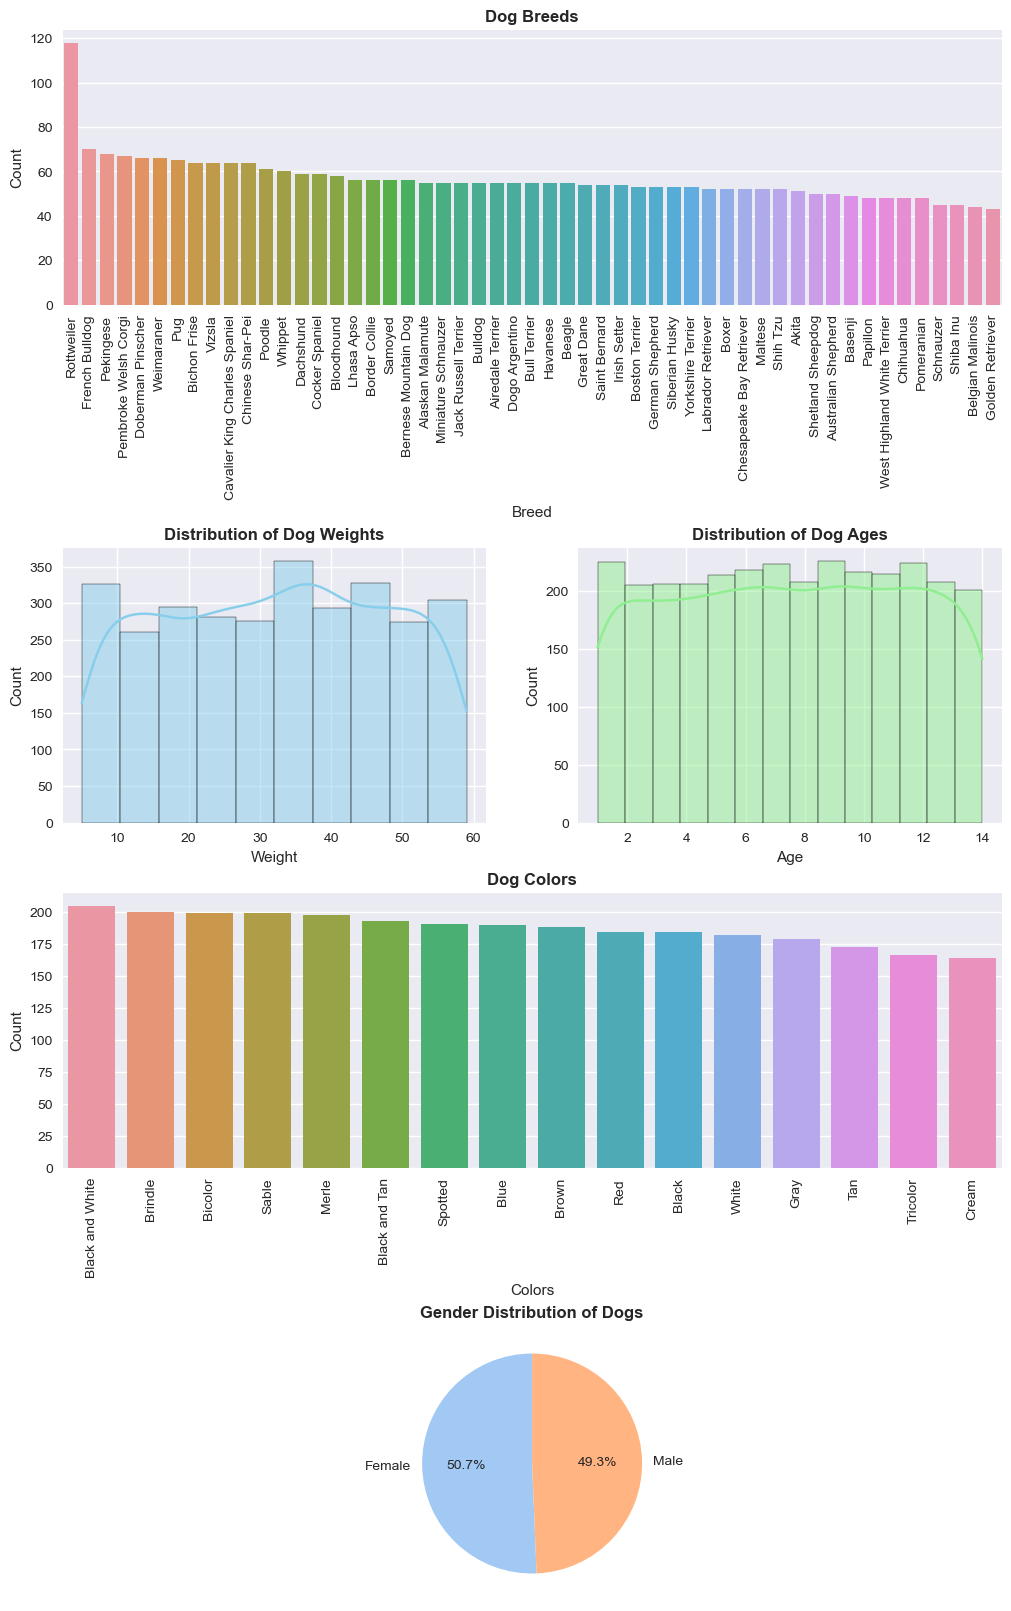

In [19]:
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(10,16), constrained_layout=True)
ax_dict = fig.subplot_mosaic([['breedcount', 'breedcount'],['weighthist', 'agehist'],['colorcount', 'colorcount'],['gendercount', 'gendercount']])

sns.barplot(x=breed_count.index, y=breed_count.values, ax=ax_dict['breedcount'])
ax_dict['breedcount'].set_title('Dog Breeds', fontweight='bold')
ax_dict['breedcount'].set_xlabel('Breed')
ax_dict['breedcount'].set_ylabel('Count')
ax_dict['breedcount'].tick_params(axis='x', rotation=90) 

sns.histplot(dogs['Weight'], bins=10, kde=True, color='skyblue', ax=ax_dict['weighthist'])
ax_dict['weighthist'].set_title('Distribution of Dog Weights', fontweight='bold')
ax_dict['weighthist'].set_xlabel('Weight')
ax_dict['weighthist'].set_ylabel('Count')

sns.histplot(dogs['Age'], kde=True, color='lightgreen', ax=ax_dict['agehist'])
ax_dict['agehist'].set_title('Distribution of Dog Ages', fontweight='bold')
ax_dict['agehist'].set_xlabel('Age')
ax_dict['agehist'].set_ylabel('Count')

sns.barplot(x=color_count.index, y=color_count.values, ax=ax_dict['colorcount'])
ax_dict['colorcount'].set_title('Dog Colors', fontweight='bold')
ax_dict['colorcount'].set_xlabel('Colors')
ax_dict['colorcount'].set_ylabel('Count')
ax_dict['colorcount'].tick_params(axis='x', rotation=90) 

ax_dict['gendercount'].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), 
    startangle=90)
ax_dict['gendercount'].set_title('Gender Distribution of Dogs', fontweight='bold')

Overall, the data shows a relatively uniform distribution across all features. Although some values occur slightly more frequently than others, the dominance is generally mild and no single group overwhelmingly leads. The only clear exception is the Rottweiler breed, which stands out as noticeably more common—appearing nearly twice as often as the other breeds.

## 5 Relationships Between Features

### ✔ Breed-Specific Color Distribution
Next, we will create a crosstab to compare dog breeds and coat colors. This will allow us to examine which colors are most common for each breed and identify patterns across the dataset

In [20]:
crossdogs=pd.crosstab(dogs['Breed'], dogs['Color'])
crossdogs.head(10)

Color,Bicolor,Black,Black and Tan,Black and White,Blue,Brindle,Brown,Cream,Gray,Merle,Red,Sable,Spotted,Tan,Tricolor,White
Breed,,,,,,,,,,,,,,,,
Airedale Terrier,5,2,4,4,1,4,4,4,4,3,3,3,1,2,7,4
Akita,4,4,3,6,2,3,4,2,0,6,4,4,3,2,3,1
Alaskan Malamute,3,0,4,3,6,5,2,2,4,6,5,1,5,1,5,3
Australian Shepherd,1,5,1,4,1,4,5,3,2,3,4,5,4,2,3,3
Basenji,4,5,3,4,1,6,2,6,2,3,1,2,3,3,3,1
Beagle,4,0,6,1,5,7,3,6,1,2,6,4,2,3,4,1
Belgian Malinois,2,5,3,5,3,1,1,2,1,2,2,3,5,2,4,3
Bernese Mountain Dog,3,0,2,2,8,9,0,3,2,0,4,5,5,4,5,4
Bichon Frise,5,3,6,2,6,5,3,3,3,5,5,3,4,4,1,6


We convert the counts in crossdogs to percentages for each breed. For each row (representing a dog breed), we divide the count of each color by the row sum and multiply by 100, then round the result to one decimal place. This gives the relative frequency of each coat color within each breed.

In [21]:
crossdogs_percent = crossdogs.apply(lambda row: row / row.sum() * 100, axis=1).round(1)
crossdogs_percent.head(10)

Color,Bicolor,Black,Black and Tan,Black and White,Blue,Brindle,Brown,Cream,Gray,Merle,Red,Sable,Spotted,Tan,Tricolor,White
Breed,,,,,,,,,,,,,,,,
Airedale Terrier,9.1,3.6,7.3,7.3,1.8,7.3,7.3,7.3,7.3,5.5,5.5,5.5,1.8,3.6,12.7,7.3
Akita,7.8,7.8,5.9,11.8,3.9,5.9,7.8,3.9,0.0,11.8,7.8,7.8,5.9,3.9,5.9,2.0
Alaskan Malamute,5.5,0.0,7.3,5.5,10.9,9.1,3.6,3.6,7.3,10.9,9.1,1.8,9.1,1.8,9.1,5.5
Australian Shepherd,2.0,10.0,2.0,8.0,2.0,8.0,10.0,6.0,4.0,6.0,8.0,10.0,8.0,4.0,6.0,6.0
Basenji,8.2,10.2,6.1,8.2,2.0,12.2,4.1,12.2,4.1,6.1,2.0,4.1,6.1,6.1,6.1,2.0
Beagle,7.3,0.0,10.9,1.8,9.1,12.7,5.5,10.9,1.8,3.6,10.9,7.3,3.6,5.5,7.3,1.8
Belgian Malinois,4.5,11.4,6.8,11.4,6.8,2.3,2.3,4.5,2.3,4.5,4.5,6.8,11.4,4.5,9.1,6.8
Bernese Mountain Dog,5.4,0.0,3.6,3.6,14.3,16.1,0.0,5.4,3.6,0.0,7.1,8.9,8.9,7.1,8.9,7.1
Bichon Frise,7.8,4.7,9.4,3.1,9.4,7.8,4.7,4.7,4.7,7.8,7.8,4.7,6.2,6.2,1.6,9.4


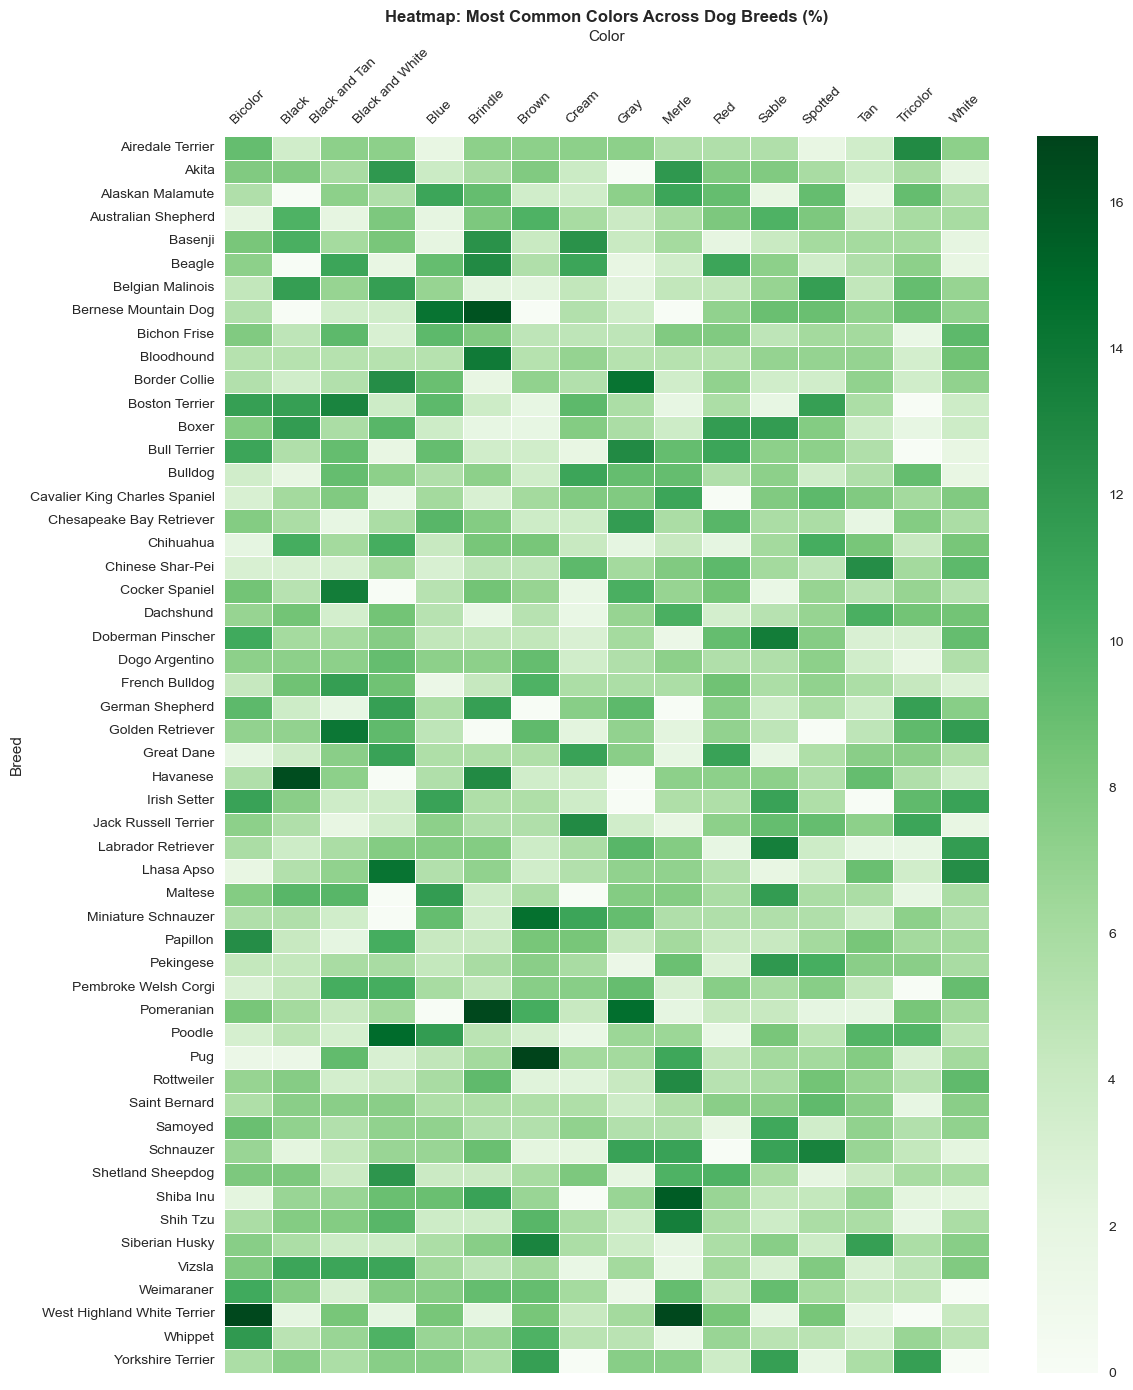

In [22]:
plt.figure(figsize=(12, 14))
sns.heatmap(crossdogs_percent, cmap="Greens", linewidths=0.5, linecolor='white')
plt.title("Heatmap: Most Common Colors Across Dog Breeds (%)",  fontweight='bold')
plt.xlabel("Color")
plt.ylabel("Breed")
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The heatmap shows the most and least common coat colors (in percentages) for each dog breed.

### ✔ Comparing Dog Breeds by Weight

In [23]:
weight_means=dogs['Weight'].groupby(dogs['Breed']).describe().sort_values(by='mean')
weight_means

,count,mean,std,min,25%,50%,75%,max
Breed,,,,,,,,
Siberian Husky,53.0,28.188679,15.890317,5.0,13.00,28.0,40.00,59.0
Chesapeake Bay Retriever,52.0,28.192308,15.003318,5.0,15.75,28.0,38.50,59.0
French Bulldog,70.0,28.957143,15.170944,5.0,17.00,31.0,41.75,58.0
Belgian Malinois,44.0,29.113636,15.318655,5.0,16.75,27.5,41.25,58.0
Yorkshire Terrier,53.0,29.471698,14.228362,5.0,19.00,30.0,41.00,55.0
West Highland White Terrier,48.0,29.520833,18.118980,5.0,13.75,25.5,46.25,59.0
Jack Russell Terrier,55.0,29.545455,14.828424,5.0,17.50,31.0,40.50,57.0
Weimaraner,66.0,29.863636,14.363293,5.0,17.00,29.5,40.75,59.0
Lhasa Apso,56.0,29.946429,15.750809,5.0,17.75,31.0,43.00,57.0


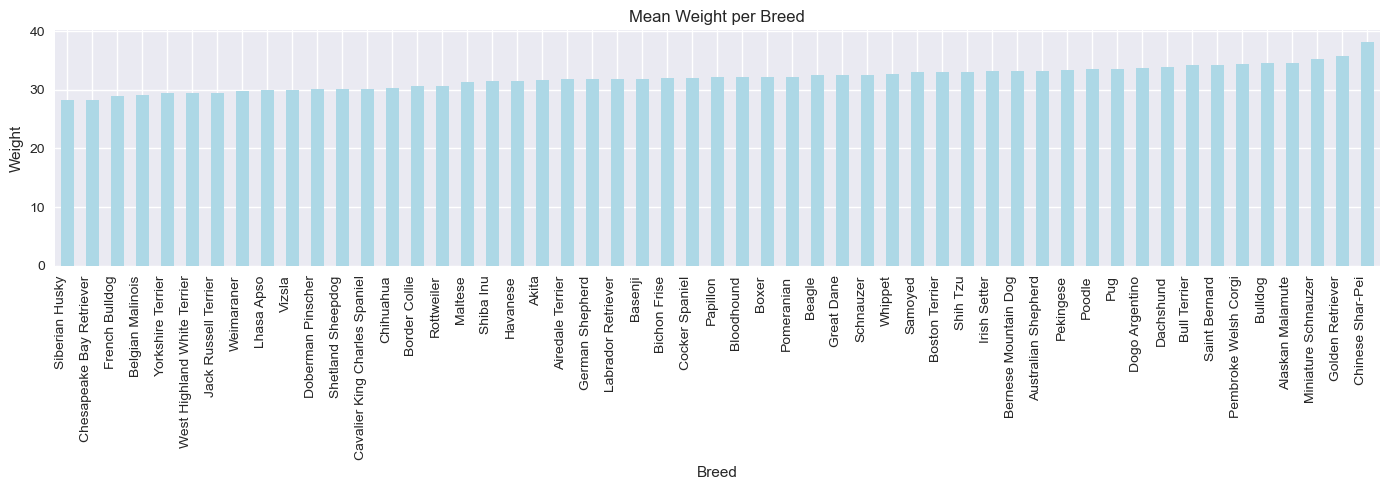

In [24]:
plt.figure(figsize=(14,5))
weight_means['mean'].plot(kind='bar', color='Lightblue')
plt.title('Mean Weight per Breed')
plt.xlabel('Breed')
plt.ylabel('Weight')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

We can see that the average weight across all breeds ranges from 28 to 38 kg, which is quite similar. The weight range for nearly every breed spans from 5 to 59 kg. The very low weight (around 5 kg) observed in larger breeds, such as Huskies, can be explained by the inclusion of puppies in the dataset. To get a more accurate comparison, we will try excluding dogs that are 1 year old from the analysis.

In [25]:
dogs[dogs['Age']>1]['Weight'].groupby(dogs['Breed']).describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
Breed,,,,,,,,
Chesapeake Bay Retriever,51.0,28.098039,15.137047,5.0,15.50,27.0,39.00,59.0
French Bulldog,62.0,28.435484,14.902548,5.0,17.00,29.5,41.00,58.0
Belgian Malinois,44.0,29.113636,15.318655,5.0,16.75,27.5,41.25,58.0
Weimaraner,59.0,29.169492,14.122802,5.0,17.00,29.0,40.00,52.0
Vizsla,63.0,29.634921,15.028255,5.0,15.50,31.0,40.00,59.0
Chihuahua,47.0,29.702128,15.735469,5.0,18.50,30.0,39.00,59.0
Siberian Husky,47.0,29.723404,15.638167,6.0,18.50,31.0,40.50,59.0
Yorkshire Terrier,51.0,29.725490,14.448638,5.0,19.00,32.0,41.00,55.0
Jack Russell Terrier,49.0,30.163265,14.027275,5.0,21.00,32.0,40.00,57.0


Since the weight range did not change significantly after excluding dogs that are 1 year old, and remains roughly from 5 kg for all breeds, including large ones, we conclude that this is due to the dataset being artificially created and not fully reflecting realistic data.

In [26]:
dogs[['Age', 'Weight']].corr()

,Age,Weight
Age,1.000000,-0.002356
Weight,-0.002356,1.000000


Additionally, there is no correlation between the weight and age of the dogs, which further suggests that the dataset is artificially generated and does not fully reflect realistic patterns

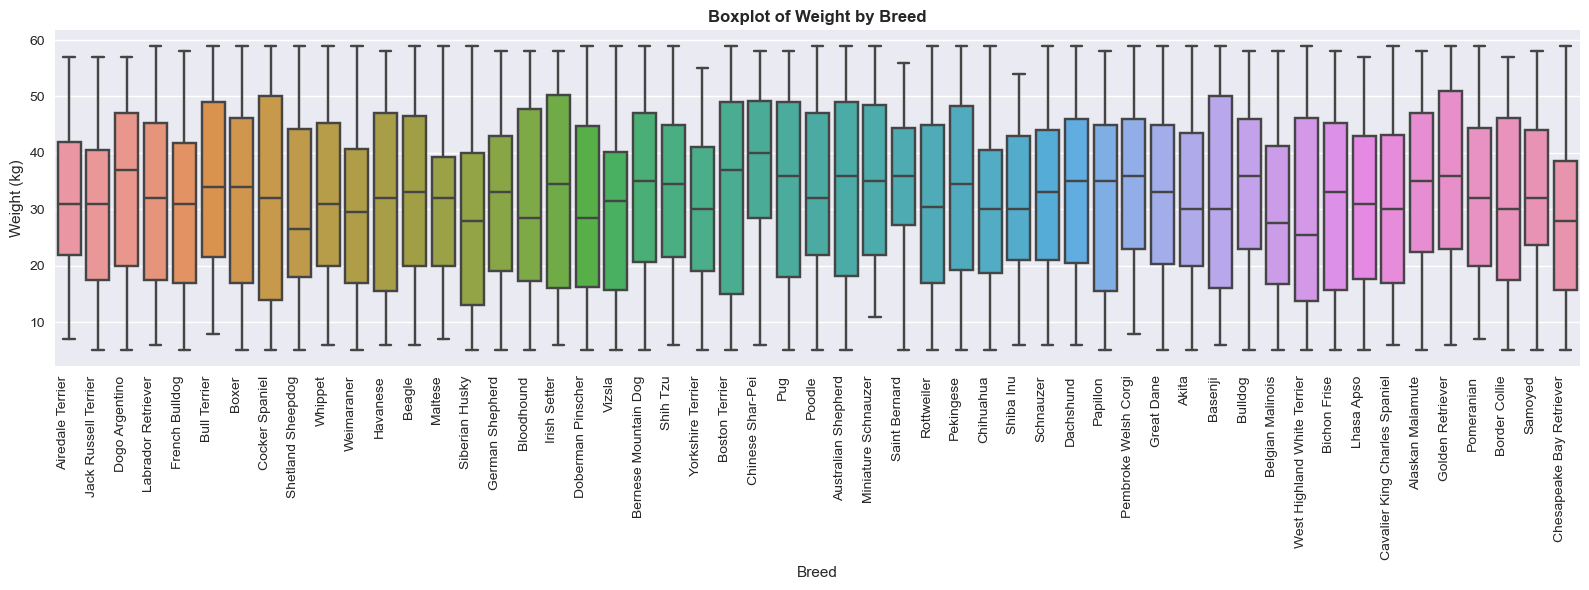

In [27]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='Breed', y='Weight', data=dogs)

plt.title('Boxplot of Weight by Breed', fontweight='bold')
plt.xlabel('Breed')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

This boxplot illustrates the statistical distribution of weight for each dog breed. Additionally, we perform cluster analysis on these weight characteristics across breeds and present the boxplots arranged according to the resulting clusters.

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


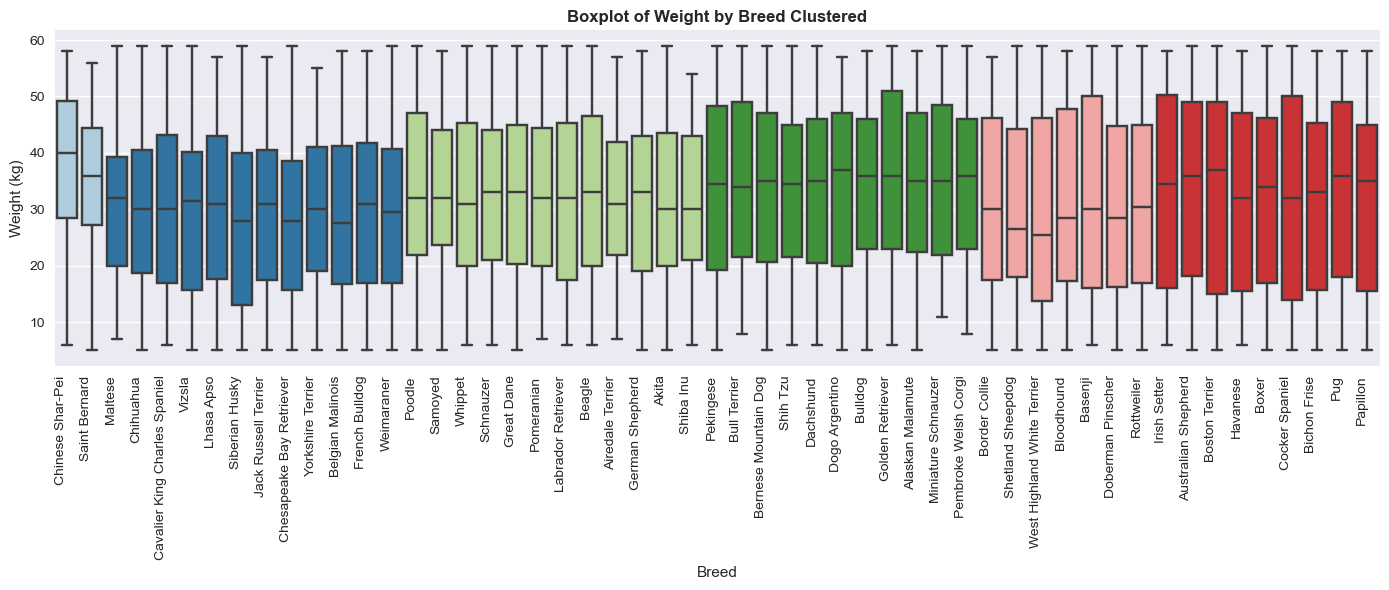

In [28]:
X = weight_means[['25%','50%','75%']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=6, random_state=27)
weight_means['cluster'] = kmeans.fit_predict(X_scaled)

n_clusters = 6  
palette = sns.color_palette("Paired", n_colors=n_clusters)

cluster_map = {i: palette[i] for i in range(n_clusters)}

sorted_breeds = weight_means.sort_values('cluster').index

breed_colors = weight_means['cluster'].map(cluster_map)


plt.figure(figsize=(14, 6))
sns.boxplot(x='Breed', y='Weight', data=dogs, order=sorted_breeds,
            palette=[breed_colors[breed] for breed in sorted_breeds])

plt.title('Boxplot of Weight by Breed Clustered', fontweight='bold')
plt.xlabel('Breed')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### ✔  Comparing Dog Weights by Age

In [29]:
age_dogs=dogs['Weight'].groupby(dogs['Age']).describe()
age_dogs

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
1,225.0,33.222222,16.494708,5.0,18.00,35.0,48.0,59.0
2,205.0,31.448780,15.843090,5.0,17.00,33.0,43.0,59.0
3,206.0,31.543689,15.774185,5.0,19.25,32.0,45.0,59.0
4,206.0,30.228155,15.195358,5.0,16.25,29.0,43.0,59.0
5,214.0,33.121495,15.830505,5.0,20.00,34.0,47.0,59.0
6,218.0,33.711009,15.789046,5.0,19.00,34.0,48.0,59.0
7,223.0,32.013453,15.054101,5.0,20.50,32.0,44.5,59.0
8,208.0,31.110577,14.957340,5.0,18.00,31.0,44.0,59.0
9,226.0,31.115044,15.204533,5.0,18.00,32.0,42.0,59.0


C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


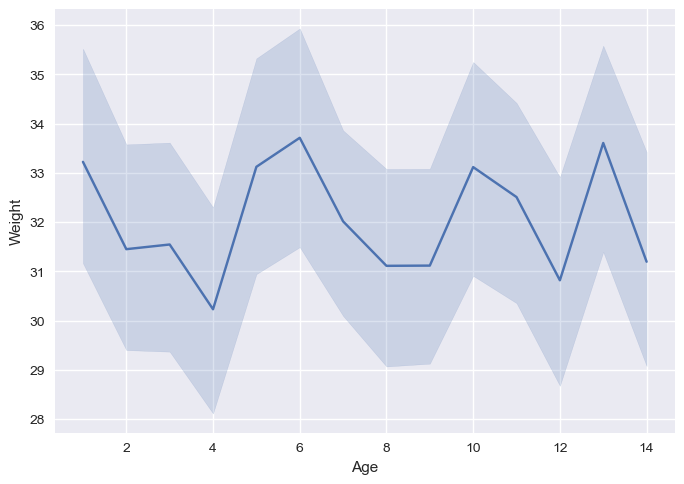

In [30]:
sns.lineplot(dogs, x="Age", y="Weight")
plt.show()

The line chart shows that the average dog weight fluctuated approximately between 30 and 34 kg across the years.
We will also identify which breed and which age had the lowest and highest average weight values in the dataset.
In addition, we will examine how the average weight changed over time for the breeds with the largest and smallest differences between their maximum and minimum weight values.

In [31]:
pivot_age = dogs.pivot_table(index='Breed', columns='Age', values='Weight', aggfunc='mean').round(1)
pivot_age

Age,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Breed,,,,,,,,,,,,,,
Airedale Terrier,40.5,39.0,21.6,9.0,30.3,28.0,24.0,26.7,33.1,34.2,8.0,35.0,38.1,38.3
Akita,29.7,24.2,50.0,27.0,22.7,26.2,29.2,25.0,28.6,30.8,41.5,27.0,40.0,44.5
Alaskan Malamute,38.8,32.0,32.3,25.5,25.0,29.8,27.8,35.0,43.7,44.8,34.0,48.7,42.2,30.0
Australian Shepherd,32.0,8.0,34.6,23.5,36.5,42.2,17.5,46.5,22.0,31.3,25.8,33.0,42.2,41.3
Basenji,34.7,23.0,25.5,34.5,55.0,34.4,29.5,18.0,28.5,33.7,38.0,34.7,32.0,27.2
Beagle,29.2,7.0,23.0,35.2,40.7,35.6,31.0,25.0,45.3,31.7,28.2,32.5,42.7,31.6
Belgian Malinois,NaN,34.8,6.0,28.0,17.3,51.0,38.7,20.5,27.0,33.5,38.0,16.2,54.0,30.3
Bernese Mountain Dog,29.7,NaN,40.5,34.1,21.2,41.1,41.0,31.0,26.3,37.3,25.0,33.3,42.4,23.5
Bichon Frise,34.6,29.5,32.8,24.4,35.2,34.9,6.0,29.7,46.3,40.3,21.5,34.8,20.0,32.5


In [32]:
max_weight = np.nanmax(pivot_age.values)
rowmax, colmax = np.where(pivot_age == max_weight)
print(f"Maximum mean weight: {max_weight} kg, Breed: {pivot_age.index[rowmax][0]}, Age: {pivot_age.columns[colmax][0]}")

Maximum mean weight: 59.0 kg, Breed: Shetland Sheepdog, Age: 14


In [33]:
min_weight = np.nanmin(pivot_age.values)
rowmin, colmin = np.where(pivot_age == min_weight)
print(f"Minimum mean weight: {min_weight} kg, Breed: {pivot_age.index[rowmin][0]}, Age: {pivot_age.columns[colmin][0]}")

Minimum mean weight: 5.0 kg, Breed: Samoyed, Age: 3


In [34]:
pivot_age['Weight_diff']= pivot_age.apply(lambda row: row.max() - row.min(), axis=1)
pivot_age

Age,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Weight_diff
Breed,,,,,,,,,,,,,,,
Airedale Terrier,40.5,39.0,21.6,9.0,30.3,28.0,24.0,26.7,33.1,34.2,8.0,35.0,38.1,38.3,32.5
Akita,29.7,24.2,50.0,27.0,22.7,26.2,29.2,25.0,28.6,30.8,41.5,27.0,40.0,44.5,27.3
Alaskan Malamute,38.8,32.0,32.3,25.5,25.0,29.8,27.8,35.0,43.7,44.8,34.0,48.7,42.2,30.0,23.7
Australian Shepherd,32.0,8.0,34.6,23.5,36.5,42.2,17.5,46.5,22.0,31.3,25.8,33.0,42.2,41.3,38.5
Basenji,34.7,23.0,25.5,34.5,55.0,34.4,29.5,18.0,28.5,33.7,38.0,34.7,32.0,27.2,37.0
Beagle,29.2,7.0,23.0,35.2,40.7,35.6,31.0,25.0,45.3,31.7,28.2,32.5,42.7,31.6,38.3
Belgian Malinois,NaN,34.8,6.0,28.0,17.3,51.0,38.7,20.5,27.0,33.5,38.0,16.2,54.0,30.3,48.0
Bernese Mountain Dog,29.7,NaN,40.5,34.1,21.2,41.1,41.0,31.0,26.3,37.3,25.0,33.3,42.4,23.5,21.2
Bichon Frise,34.6,29.5,32.8,24.4,35.2,34.9,6.0,29.7,46.3,40.3,21.5,34.8,20.0,32.5,40.3


C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


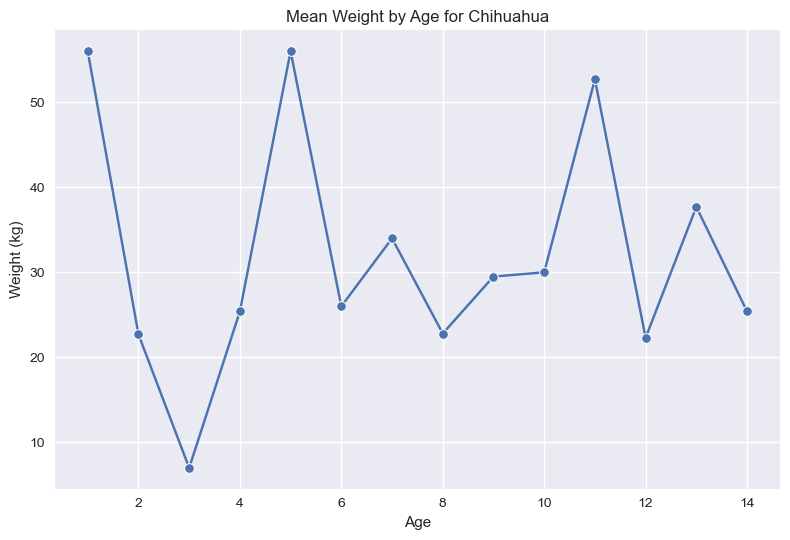

In [35]:
breed_max = pivot_age['Weight_diff'].idxmax()

sns.lineplot(x = pivot_age.columns[:-1],y = pivot_age.loc[breed_max].iloc[:-1],marker="o")

plt.title(f"Mean Weight by Age for {breed_max}")
plt.xlabel("Age")
plt.ylabel("Weight (kg)")
plt.tight_layout()
plt.show()

C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


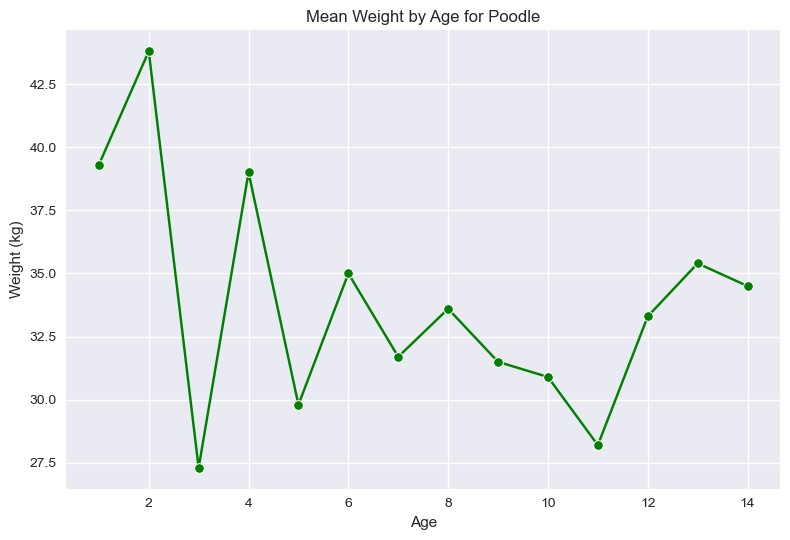

In [36]:
breed_min = pivot_age['Weight_diff'].idxmin()

sns.lineplot(x = pivot_age.columns[:-1],y = pivot_age.loc[breed_min].iloc[:-1],marker="o", color='Green')

plt.title(f"Mean Weight by Age for {breed_min}")
plt.xlabel("Age")
plt.ylabel("Weight (kg)")
plt.tight_layout()
plt.show()

### ✔ Comparing Dog Weights by Gender

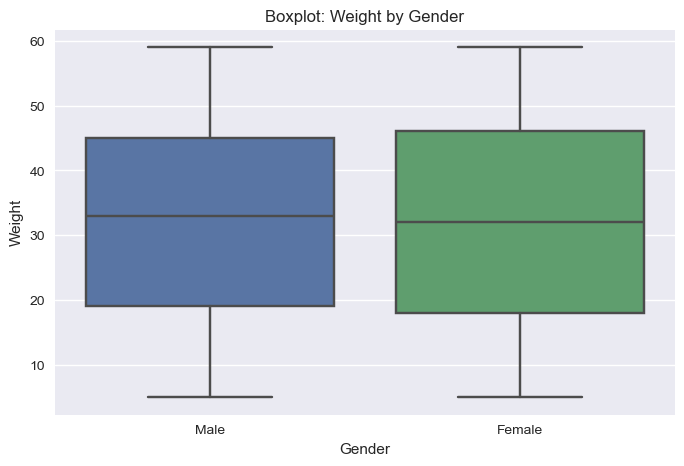

In [39]:
plt.figure(figsize=(8, 5))

sns.boxplot(data=dogs, x="Gender", y="Weight")

plt.title("Boxplot: Weight by Gender")
plt.xlabel("Gender")
plt.ylabel("Weight")

plt.show()

The boxplot shows that the weight distributions of males and females are very similar overall. The central tendency (median) is nearly the same for both genders, indicating no meaningful difference in average weight. The only noticeable variation is that females have a slightly wider interquartile range, suggesting a bit more variability in their weights. However, this difference is minor and does not indicate any strong gender-based separation in weight.